In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv("~/Downloads/housetrain.csv")
test = pd.read_csv("~/Downloads/housetest.csv")

In [3]:
train.head()

,Id,MSSubClass,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,GarageType,GarageYrBlt,...,Street,Alley,LotShape,MSZoning,LotFrontage,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,0,Gd,MnPrv,Shed,0,Attchd,2003,...,Pave,Grvl,Reg,RL,65,2,2008,WD,Normal,208500
1,2,20,0,0,Gd,MnPrv,Shed,0,Attchd,1976,...,Pave,Grvl,Reg,RL,80,5,2007,WD,Normal,181500
2,3,60,0,0,Gd,MnPrv,Shed,0,Attchd,2001,...,Pave,Grvl,IR1,RL,68,9,2008,WD,Normal,223500
3,4,70,0,0,Gd,MnPrv,Shed,0,Detchd,1998,...,Pave,Grvl,IR1,RL,60,2,2006,WD,Abnorml,140000
4,5,60,0,0,Gd,MnPrv,Shed,0,Attchd,2000,...,Pave,Grvl,IR1,RL,84,12,2008,WD,Normal,250000


In [5]:
test.isnull().sum().sum()

0

In [7]:
train_dummies = pd.get_dummies(train.drop("Id", axis = 1))

In [8]:
test_dummies = pd.get_dummies(test.drop("Id", axis = 1))

In [9]:
print(train_dummies.shape)
print(test_dummies.shape)

(1460, 289)
(1459, 270)


In [10]:
import statsmodels.api as sma

In [11]:
y = train_dummies.SalePrice
X = train_dummies.drop("SalePrice", axis = 1)

In [12]:
model = sma.OLS(y,X).fit()

In [13]:
# H0: Data is Linear
# H1: Data is Not Linear
sma.stats.diagnostic.linear_rainbow(model)

(0.678641961115048, 0.9999991470393047)

### Fitting the Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [18]:
pred_lr = lr.fit(xtrain, ytrain).predict(xtest)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
r2_score(ytest, pred_lr)

0.6019495732477786

In [21]:
np.sqrt(mean_squared_error(ytest, pred_lr))

51984.23742147738

In [22]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Regularization

In [23]:
# Predictors
predictors = xtrain.columns

In [24]:
coef = pd.Series(lr.coef_, predictors).sort_values()

In [25]:
coef

Condition2_PosN         -347015.911043
GarageCond_Ex            -80567.627522
PoolQC_Ex                -64593.936600
MiscFeature_Gar2         -55966.230647
LandSlope_Sev            -43024.854625
HouseStyle_2.5Fin        -38290.090435
Electrical_Mix           -37919.753328
Heating_OthW             -33063.395849
RoofMatl_Roll            -33042.332042
GarageQual_Po            -31229.761065
BsmtCond_Gd              -26644.388791
RoofMatl_WdShake         -26435.780914
SaleCondition_Partial    -24550.292692
RoofStyle_Flat           -24526.861999
MSZoning_C (all)         -24137.431810
BsmtCond_Fa              -23539.929622
GarageQual_Fa            -23525.743206
Exterior1st_BrkComm      -21957.439847
GarageQual_TA            -21051.977166
RoofStyle_Gable          -20703.797498
SaleType_ConLw           -20552.581409
BsmtCond_TA              -20128.988077
Neighborhood_Mitchel     -19581.618851
RoofStyle_Hip            -19569.546546
SaleType_WD              -19531.935983
Condition1_RRAe          

In [142]:
df = pd.DataFrame(lr.coef_==0, index=predictors, columns=["Coeffients"]) 

In [143]:
df[df.Coeffients==True]

,Coeffients
Condition2_PosA,True
Condition2_RRAn,True
Condition2_RRNn,True


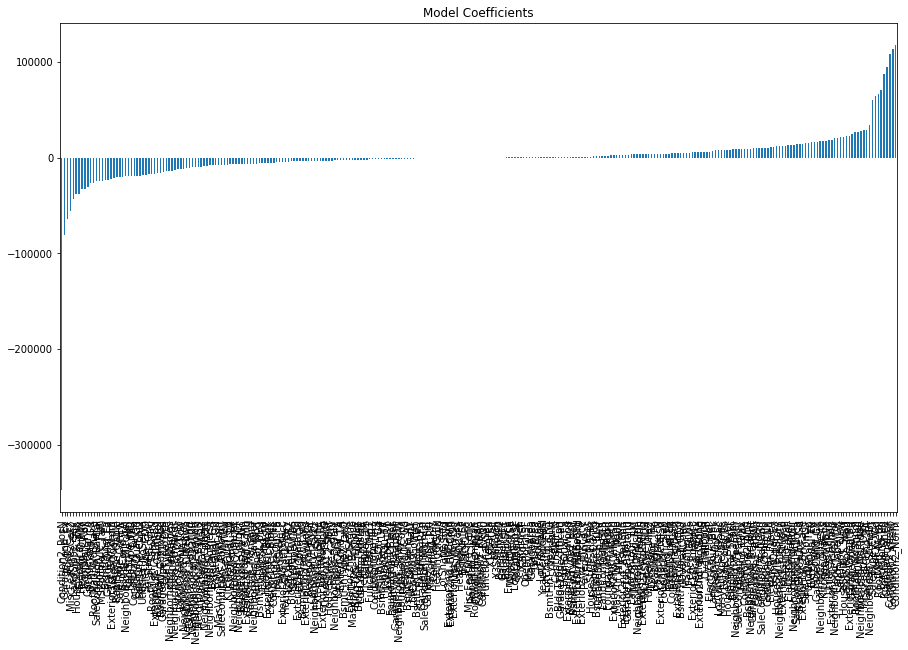

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[15,9])
coef.plot(kind="bar", title = "Model Coefficients")

We can see that 02 coefficients is much higher as compared to rest of the coefficients. Therefore the total sales of an item would be more driven by these two features.

We will apply Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridgeReg = Ridge(alpha=5, normalize=True) # So, the larger is the alpha, the higher is the smoothness constraint

# The Purpose is to shrink the Coefficient Value to 0 so that it can become smooth and perfect fit.

In [28]:
ridgeReg.fit(xtrain,ytrain)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [29]:
pred_ridge = ridgeReg.predict(xtest)

In [30]:
r2_score(ytest, pred_ridge)

0.7276250749158142

In [31]:
np.sqrt(mean_squared_error(ytest, pred_ridge))

43001.7561865733

In [32]:
coef = pd.Series(ridgeReg.coef_, predictors).sort_values()

In [37]:
coef.max()

21327.60524909594

In [33]:
df_ridge = pd.DataFrame(ridgeReg.coef_==0, index=predictors, columns=["Coeffients"])

In [34]:
df_ridge[df_ridge.Coeffients==True]

,Coeffients
PoolQC_Fa,True
MiscFeature_TenC,True
Functional_Sev,True
RoofMatl_ClyTile,True
RoofMatl_Membran,True
Condition2_PosA,True
Condition2_RRAn,True
Condition2_RRNn,True


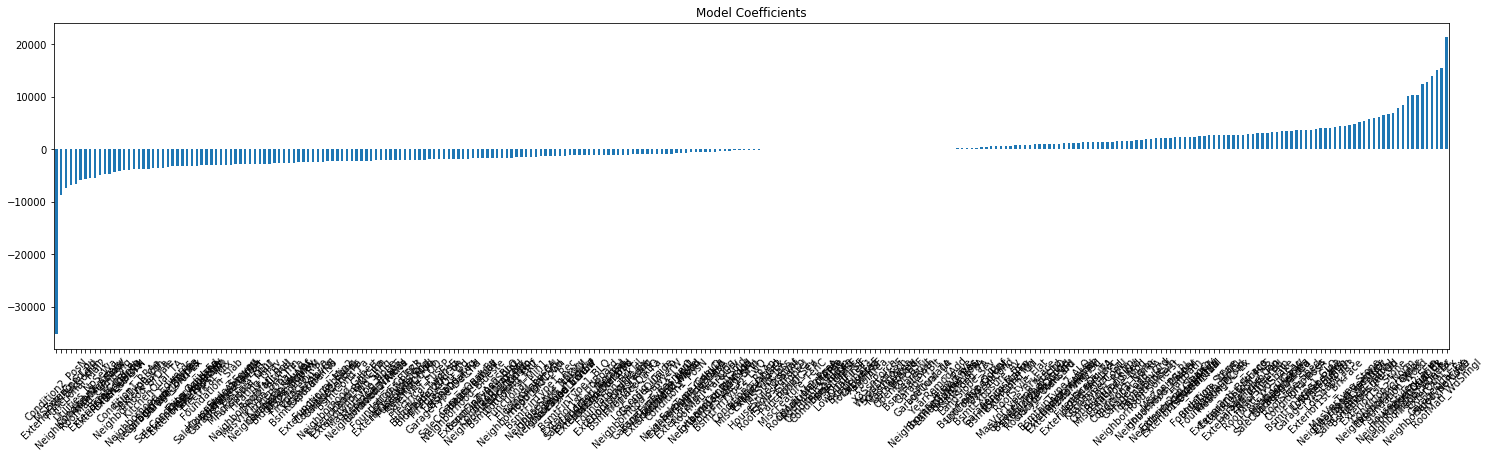

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=[25,6])
coef.plot(kind="bar", title = "Model Coefficients")
plt.xticks(rotation = 45)
plt.show()

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lassoReg = Lasso(alpha=50, normalize=True)

In [40]:
lassoReg.fit(xtrain,ytrain)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
pred_lasso = lassoReg.predict(xtest)

In [42]:
r2_score(ytest, pred_lasso)

0.737650234334194

In [43]:
np.sqrt(mean_squared_error(ytest, pred_lasso))

42202.965697256695

In [44]:
coef = pd.Series(lassoReg.coef_, predictors).sort_values()

In [45]:
coef.max()

45567.63054534512

In [161]:
df_lasso = pd.DataFrame(lassoReg.coef_==0, index=predictors, columns=["Coeffients"])
df_lasso[df_lasso.Coeffients==True]

,Coeffients
ScreenPorch,True
PoolArea,True
MiscVal,True
GarageYrBlt,True
EnclosedPorch,True
X3SsnPorch,True
BsmtHalfBath,True
HalfBath,True
BedroomAbvGr,True
TotRmsAbvGrd,True


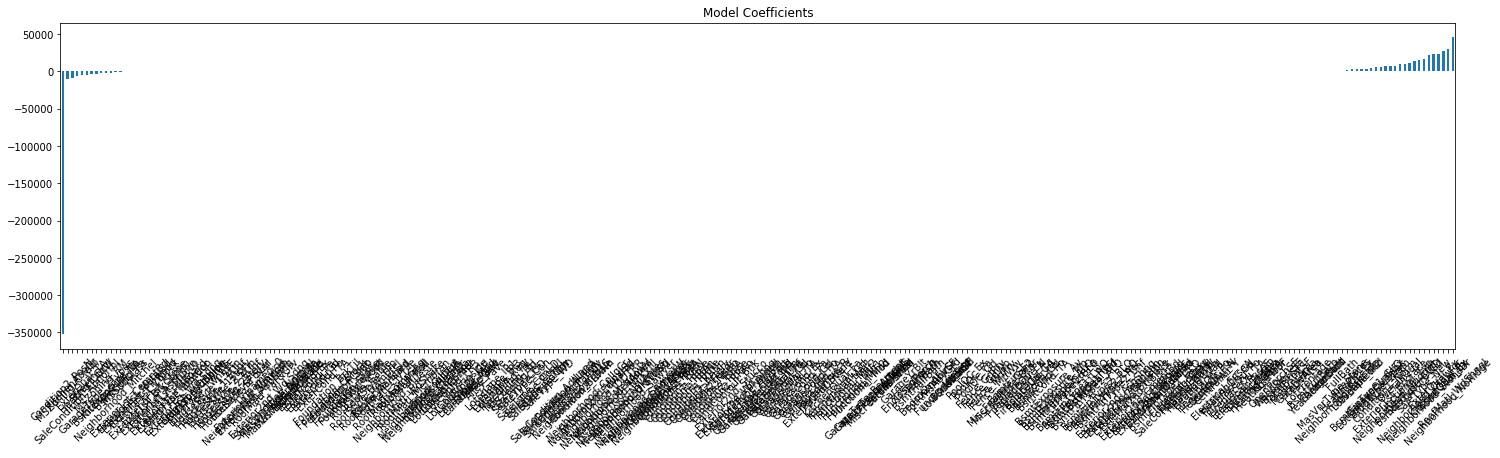

In [98]:
plt.figure(figsize=[25,6])
coef.plot(kind="bar", title = "Model Coefficients")
plt.xticks(rotation = 45)
plt.show()

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
ENreg = ElasticNet(normalize=False)

In [48]:
ENreg.fit(xtrain,ytrain)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
pred_cv = ENreg.predict(xtest)

In [50]:
np.sqrt(mean_squared_error(ytest, pred_cv))

43193.18889085591

In [51]:
r2_score(ytest, pred_cv)

0.7251945914522319

In [52]:
coef = pd.Series(ENreg.coef_, predictors).sort_values()

In [53]:
coef.max()

8551.436812749633

In [185]:
df_Elastic = pd.DataFrame(ENreg.coef_==0, index=predictors, columns=["Coeffients"])
df_Elastic[df_Elastic.Coeffients==True]

,Coeffients
PoolQC_Fa,True
MiscFeature_TenC,True
Functional_Sev,True
RoofMatl_ClyTile,True
RoofMatl_Membran,True
Condition2_PosA,True
Condition2_RRAn,True
Condition2_RRNn,True


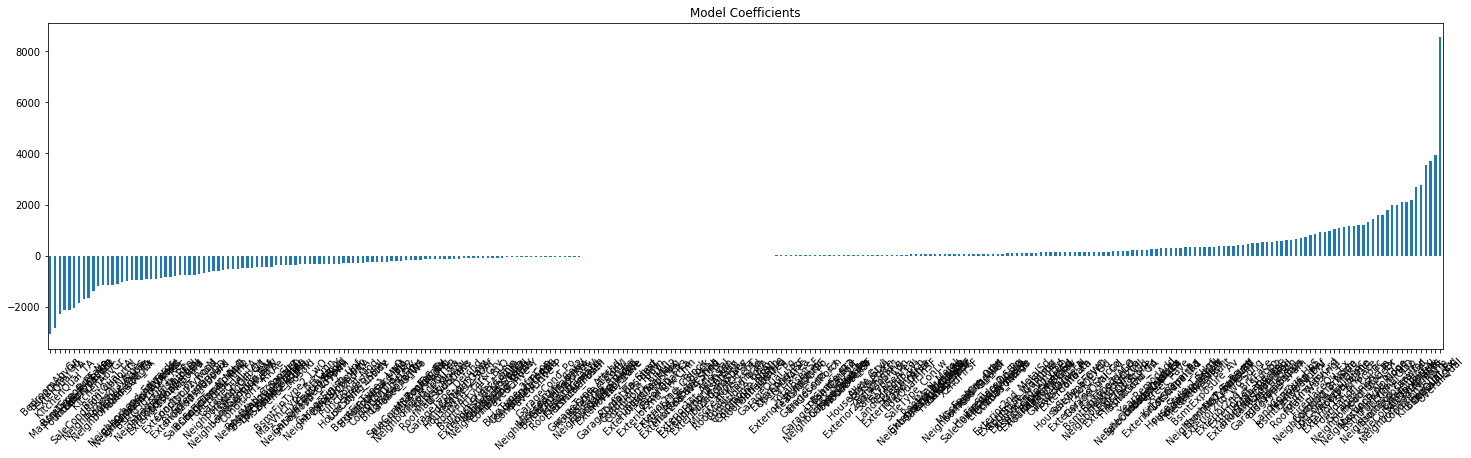

In [106]:
plt.figure(figsize=[25,6])
coef.plot(kind="bar", title = "Model Coefficients")
plt.xticks(rotation = 45)
plt.show()